In [92]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler ,normalize
data=pd.read_csv("CC GENERAL.csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [59]:
data.isnull().sum().sum()

314

In [60]:
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(),inplace=True)

In [61]:
data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mean(),inplace=True)

In [62]:
data.drop("CUST_ID",axis=1,inplace=True)

In [63]:
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)

In [64]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


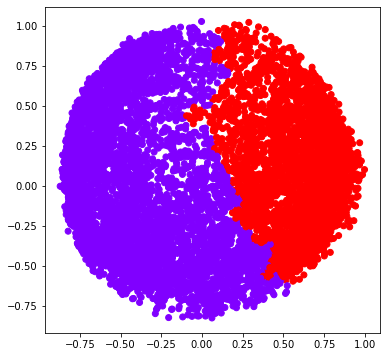

In [66]:

scaler = StandardScaler() 
data_scaled = scaler.fit_transform(data) 
  

data_normalized = normalize(data_scaled) 
  

data_normalized = pd.DataFrame(data_normalized) 
pca = PCA(n_components = 2) 
data_principal = pca.fit_transform(data_normalized) 
data_principal = pd.DataFrame(data_principal) 
data_principal.columns = ['P1', 'P2']
ac2 = AgglomerativeClustering(n_clusters = 2) 

plt.figure(figsize =(6, 6)) 
plt.scatter(data_principal['P1'], data_principal['P2'],  
           c = ac2.fit_predict(data_principal), cmap ='rainbow') 
plt.show()

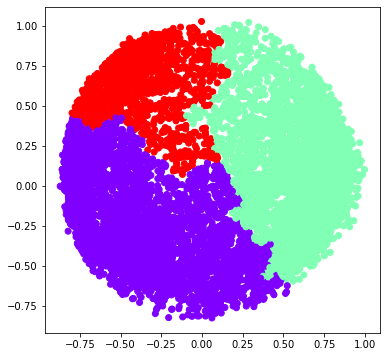

In [67]:
ac2 = AgglomerativeClustering(n_clusters = 3) 

plt.figure(figsize =(6, 6)) 
plt.scatter(data_principal['P1'], data_principal['P2'],  
           c = ac2.fit_predict(data_principal), cmap ='rainbow') 
plt.show()

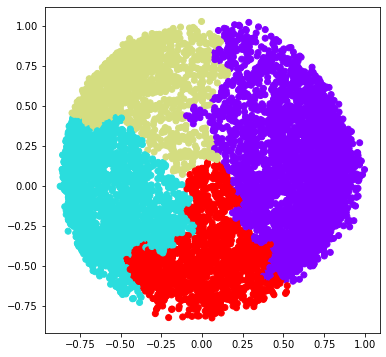

In [68]:
ac2 = AgglomerativeClustering(n_clusters = 4) 

plt.figure(figsize =(6, 6)) 
plt.scatter(data_principal['P1'], data_principal['P2'],  
           c = ac2.fit_predict(data_principal), cmap ='rainbow') 
plt.show()

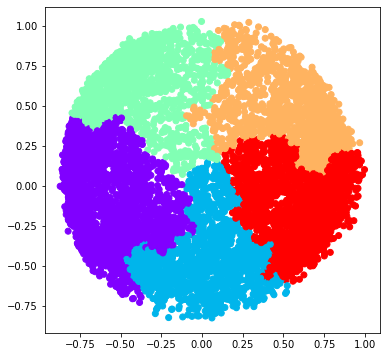

In [69]:
ac2 = AgglomerativeClustering(n_clusters = 5) 

plt.figure(figsize =(6, 6)) 
plt.scatter(data_principal['P1'], data_principal['P2'],  
           c = ac2.fit_predict(data_principal), cmap ='rainbow') 
plt.show()

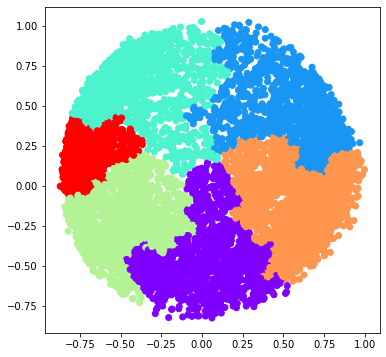

In [70]:
ac2 = AgglomerativeClustering(n_clusters = 6) 

plt.figure(figsize =(6, 6)) 
plt.scatter(data_principal['P1'], data_principal['P2'],  
           c = ac2.fit_predict(data_principal), cmap ='rainbow') 
plt.show()

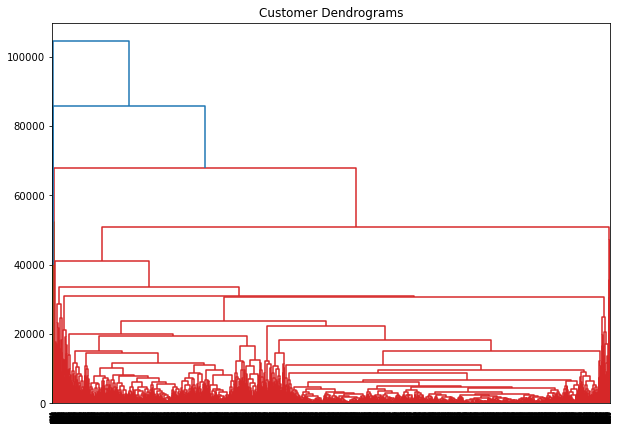

In [71]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

In [72]:
kmeans=KMeans(n_clusters=5, random_state=0) 
kmeans.fit(data)

KMeans(n_clusters=5, random_state=0)

In [75]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,4
2,4
3,4
4,0
...,...
8945,0
8946,0
8947,0
8948,0


In [77]:
data["labels"]=labels[0]

In [80]:
Sum_Squared_Distances=[]
K = range(1,15)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(data)
    Sum_Squared_Distances.append(km.inertia_)
    
    

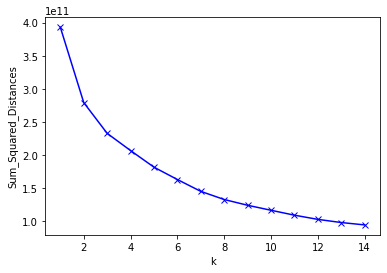

In [81]:
plt.plot(K,Sum_Squared_Distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_Squared_Distances')
plt.show()


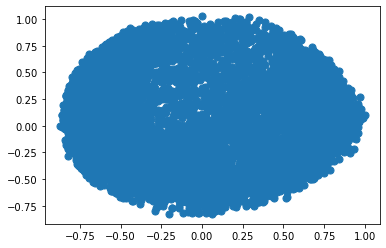

In [94]:
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=8950, centers=3,
                       cluster_std=0.60, random_state=0)
plt.scatter(data_principal['P1'], data_principal['P2'], s=50)

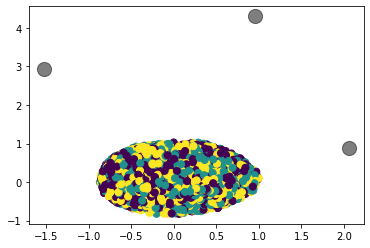

In [95]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(data_principal['P1'], data_principal['P2'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [82]:
kmeans=KMeans(n_clusters=3, random_state=0) 
kmeans.fit(data)
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,1
2,1
3,1
4,0
...,...
8945,0
8946,0
8947,0
8948,0


In [83]:
data["labels"]=labels[0]

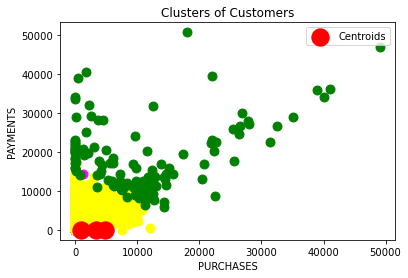

In [86]:
plt.scatter(data["PURCHASES"][data.labels == 0],          
            data["PAYMENTS"][data.labels == 0],s=80,c='magenta',)
plt.scatter(data["PURCHASES"][data.labels == 1],
           data["PAYMENTS"][data.labels == 1],s=80,c='yellow',)
plt.scatter(data["PURCHASES"][data.labels == 2],
           data["PAYMENTS"][data.labels == 2],s=80,c='green',)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('PURCHASES')
plt.ylabel('PAYMENTS')
plt.legend()
plt.show()

After using PCA i think in this case the agglomerative clustering is better because kmeans seems to have a problem with PCA and it gives better plots